In [1]:
%matplotlib inline
import pandas as pd
import geopandas

In [2]:
countries = geopandas.read_file('ne_110m_admin_0_countries.shp')
cities = geopandas.read_file('ne_110m_populated_places.shp')
rivers = geopandas.read_file('ne_50m_rivers_lake_centerlines.shp')

In [3]:
# Joining dataframes 
cities2 = cities[cities['NAME'].isin(['Bern', 'Brussels', 'Zagreb', 'Ljubljana'])].copy()
cities2['iso_a3'] = ['CHE', 'BEL', 'HRV', 'SVN']
cities2

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,iso_a3
19,4,50,8,Admin-0 capital,Ljubljana,None,None,Ljubljana,1,None,...,None,None,None,None,None,None,None,None,POINT (14.51497 46.05529),CHE
26,4,50,7,Admin-0 capital,Bern,None,None,Bern,1,None,...,None,None,None,None,None,None,None,None,POINT (7.46698 46.91668),BEL
95,3,110,8,Admin-0 capital,Zagreb,None,None,Zagreb,1,None,...,None,None,None,None,None,None,None,None,POINT (15.99999 45.80001),HRV
170,2,200,8,Admin-0 capital,Brussels,None,Bruxelles-Brussel,Brussels,1,None,...,None,None,None,None,None,None,None,None,POINT (4.33137 50.83526),SVN


In [4]:
countries2 = countries[['ISO_A3', 'NAME', 'CONTINENT']]
countries2 = countries2.rename(columns={'ISO_A3': 'iso_a3'})
countries2.head()

,iso_a3,NAME,CONTINENT
0,FJI,Fiji,Oceania
1,TZA,Tanzania,Africa
2,ESH,W. Sahara,Africa
3,CAN,Canada,North America
4,USA,United States of America,North America


In [5]:
cities2.merge(countries2, on='iso_a3', how='left')

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME_x,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,...,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,iso_a3,NAME_y,CONTINENT
0,4,50,8,Admin-0 capital,Ljubljana,None,None,Ljubljana,1,None,...,None,None,None,None,None,None,POINT (14.51497 46.05529),CHE,Switzerland,Europe
1,4,50,7,Admin-0 capital,Bern,None,None,Bern,1,None,...,None,None,None,None,None,None,POINT (7.46698 46.91668),BEL,Belgium,Europe
2,3,110,8,Admin-0 capital,Zagreb,None,None,Zagreb,1,None,...,None,None,None,None,None,None,POINT (15.99999 45.80001),HRV,Croatia,Europe
3,2,200,8,Admin-0 capital,Brussels,None,Bruxelles-Brussel,Brussels,1,None,...,None,None,None,None,None,None,POINT (4.33137 50.83526),SVN,Slovenia,Europe


In [6]:
## geopandas.sjoin function

joined = geopandas.sjoin(cities, countries, op='within', how='left')
joined

,SCALERANK,NATSCALE,LABELRANK_left,FEATURECLA,NAME_left,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,...,FCLASS_VN_right,FCLASS_TR_right,FCLASS_ID_right,FCLASS_PL_right,FCLASS_GR_right,FCLASS_IT_right,FCLASS_NL_right,FCLASS_SE_right,FCLASS_BD_right,FCLASS_UA_right
0,8,10,3,Admin-0 capital,Vatican City,None,None,Vatican City,1,None,...,None,None,None,None,None,None,None,None,None,None
1,7,20,0,Admin-0 capital,San Marino,None,None,San Marino,1,None,...,None,None,None,None,None,None,None,None,None,None
2,7,20,0,Admin-0 capital,Vaduz,None,None,Vaduz,1,None,...,None,None,None,None,None,None,None,None,None,None
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,Lobamba,0,Legislative and,...,None,None,None,None,None,None,None,None,None,None
4,6,30,8,Admin-0 capital,Luxembourg,None,None,Luxembourg,1,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0,600,1,Admin-1 capital,Rio de Janeiro,None,None,Rio de Janeiro,0,None,...,None,None,None,None,None,None,None,None,None,None
239,0,600,1,Admin-1 capital,São Paulo,None,Sao Paulo|Sio Paulo,Sao Paulo,0,None,...,None,None,None,None,None,None,None,None,None,None
240,0,600,3,Admin-1 capital,Sydney,None,None,Sydney,0,None,...,None,None,None,None,None,None,None,None,None,None
241,0,600,0,Admin-0 capital,Singapore,None,None,Singapore,1,None,...,None,None,None,None,None,None,None,None,None,None


In [7]:
joined['CONTINENT'].value_counts()

Asia             59
Africa           57
Europe           46
North America    26
South America    14
Oceania           8
Name: CONTINENT, dtype: int64

In [8]:
geopandas.sjoin?

Signature:
geopandas.sjoin(
    left_df,
    right_df,
    how='inner',
    op='intersects',
    lsuffix='left',
    rsuffix='right',
)
Docstring:
Spatial join of two GeoDataFrames.

See the User Guide page :doc:`../../user_guide/mergingdata` for details.


Parameters
----------
left_df, right_df : GeoDataFrames
how : string, default 'inner'
    The type of join:

    * 'left': use keys from left_df; retain only left_df geometry column
    * 'right': use keys from right_df; retain only right_df geometry column
    * 'inner': use intersection of keys from both dfs; retain only
      left_df geometry column
op : string, default 'intersects'
    Binary predicate. Valid values are determined by the spatial index used.
    You can check the valid values in left_df or right_df as
    ``left_df.sindex.valid_query_predicates`` or
    ``right_df.sindex.valid_query_predicates``
lsuffix : string, default 'left'
    Suffix to apply to overlapping column names (left GeoDataFrame).
rsuffix : string,

<AxesSubplot:>

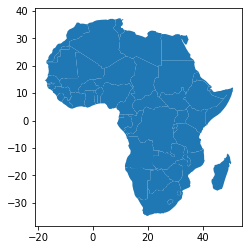

In [9]:
## The overlay operation
## Joining attributes based on a spatial relationship between the geometries. Geometries need to at least overlap partially.

africa = countries[countries['CONTINENT'] == 'Africa']
africa.plot()

C:\Users\Ivan\AppData\Local\Temp/ipykernel_17072/980089176.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cities['geometry'] = cities.buffer(2)


<AxesSubplot:>

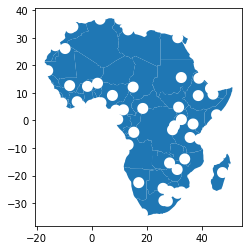

In [10]:
cities['geometry'] = cities.buffer(2)
geopandas.overlay(africa, cities, how='difference').plot()

Spatial join : transfer attributes from one dataframe to another based on the spatial relationship

Spatial overlay: construct new geometries based on spatial operation between both dataframes (and combining attributes of both dataframes)